# Avocado Project
### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 


The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 


Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:


- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 


The dataset can be seen in two angles to find the region and find the average price .\
Task: One of Classification and other of Regression\
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [34]:
# libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [35]:
df = pd.read_csv('avocado.csv')
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [37]:
df.iloc[:,0]

0         0
1         1
2         2
3         3
4         4
         ..
18244     7
18245     8
18246     9
18247    10
18248    11
Name: Unnamed: 0, Length: 18249, dtype: int64

In [38]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [39]:
df.duplicated().sum()


0

In [40]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [41]:
df['region'].nunique()

54

In [42]:
df['Date'].nunique()

169

Intial observation:
- Data is collected from multiple outlets of Hass avocados sharing the dates from 2015 to 2018
- No misssing or duplicate values
- 'Unnamed : 0' column  will be  removed as it does not contain any useful information for our analysis.
  


In [43]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


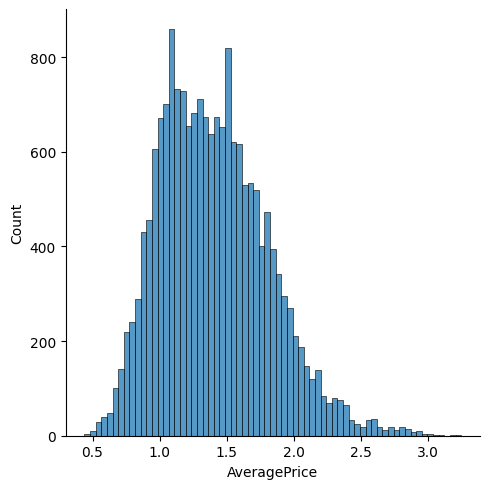

In [44]:
import seaborn as sns
sns.displot(df['AveragePrice'])

In [45]:
# Average price by type
df.groupby(by='type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [46]:
# MAx average price by type
df.groupby(by='type')['AveragePrice'].max()

type
conventional    2.22
organic         3.25
Name: AveragePrice, dtype: float64

In [47]:
# Min average price by type
df.groupby(by='type')['AveragePrice'].min()

type
conventional    0.46
organic         0.44
Name: AveragePrice, dtype: float64

- So there is place where organic produce is cheaper than conventional produce

In [48]:
# Min average price by region
df.groupby(by='region')['AveragePrice'].min().sort_values(ascending=True)

region
CincinnatiDayton       0.44
PhoenixTucson          0.46
Detroit                0.48
Nashville              0.51
Houston                0.51
Columbus               0.52
WestTexNewMexico       0.52
LosAngeles             0.53
LasVegas               0.54
Jacksonville           0.54
Louisville             0.56
Tampa                  0.56
StLouis                0.58
Orlando                0.58
Boise                  0.58
NewOrleansMobile       0.58
MiamiFtLauderdale      0.59
Denver                 0.60
SanDiego               0.61
Atlanta                0.62
Southeast              0.62
SouthCentral           0.62
DallasFtWorth          0.65
West                   0.66
California             0.67
Portland               0.68
SouthCarolina          0.69
Seattle                0.70
Roanoke                0.70
Chicago                0.70
GreatLakes             0.73
Spokane                0.74
Plains                 0.76
TotalUS                0.76
Indianapolis           0.77
GrandRapids  

In [49]:
# Min average price for organic produce in CincinnatiDayton region
df[(df['region'] == 'CincinnatiDayton') & (df['type'] == 'organic')]['AveragePrice'].min()


0.44

In [50]:
# Min average price for oconventional produce in CincinnatiDayton region
df[(df['region'] == 'CincinnatiDayton') & (df['type'] == 'conventional')]['AveragePrice'].min()


0.6

In [51]:
# Min average price for coventional produce
df[df['type'] == 'conventional'].groupby('region')['AveragePrice'].min().sort_values(ascending=True)

region
PhoenixTucson          0.46
Houston                0.51
WestTexNewMexico       0.52
LosAngeles             0.53
LasVegas               0.54
Jacksonville           0.54
Tampa                  0.56
Boise                  0.58
Orlando                0.58
NewOrleansMobile       0.58
MiamiFtLauderdale      0.59
Denver                 0.60
Nashville              0.60
CincinnatiDayton       0.60
SanDiego               0.61
SouthCentral           0.62
Southeast              0.62
Detroit                0.65
DallasFtWorth          0.65
West                   0.66
California             0.67
Atlanta                0.68
Portland               0.68
SouthCarolina          0.69
Columbus               0.69
Chicago                0.70
GreatLakes             0.73
StLouis                0.74
Spokane                0.74
Seattle                0.75
Louisville             0.75
TotalUS                0.76
Plains                 0.76
NewYork                0.77
Indianapolis           0.77
GrandRapids  

In [52]:
# Min average price for organic produce in PhoenixTucson
df[(df['region'] == 'PhoenixTucson') & (df['type'] == 'organic')]['AveragePrice'].min()

1.12

In [53]:
# Max average price for organic produce
df[df['type'] == 'organic'].groupby('region')['AveragePrice'].max().sort_values(ascending=False)

region
SanFrancisco           3.25
Tampa                  3.17
MiamiFtLauderdale      3.05
RaleighGreensboro      3.04
LasVegas               3.03
Jacksonville           2.99
Seattle                2.96
Spokane                2.95
WestTexNewMexico       2.93
Orlando                2.87
Portland               2.86
StLouis                2.84
Charlotte              2.83
Sacramento             2.82
Boise                  2.79
Atlanta                2.75
SanDiego               2.74
GrandRapids            2.73
HartfordSpringfield    2.68
NewYork                2.65
PhoenixTucson          2.62
California             2.58
BuffaloRochester       2.57
West                   2.52
Philadelphia           2.45
Syracuse               2.44
LosAngeles             2.44
Southeast              2.33
NewOrleansMobile       2.32
Northeast              2.31
Chicago                2.30
Louisville             2.29
BaltimoreWashington    2.28
Roanoke                2.27
HarrisburgScranton     2.27
Nashville    

In [54]:
# Max average price for coventional produce
df[df['type'] == 'conventional'].groupby('region')['AveragePrice'].max().sort_values(ascending=False)

region
Chicago                2.22
SanFrancisco           2.20
GrandRapids            2.19
Seattle                2.07
MiamiFtLauderdale      2.04
Jacksonville           2.00
Orlando                2.00
NewYork                1.99
GreatLakes             1.98
Louisville             1.98
Indianapolis           1.97
Tampa                  1.96
Detroit                1.94
CincinnatiDayton       1.90
Portland               1.90
Spokane                1.89
Philadelphia           1.89
Boise                  1.89
NorthernNewEngland     1.88
Sacramento             1.87
BaltimoreWashington    1.86
HartfordSpringfield    1.85
SanDiego               1.83
StLouis                1.83
Columbus               1.83
Southeast              1.82
Plains                 1.81
Boston                 1.81
LosAngeles             1.80
Albany                 1.80
California             1.78
Charlotte              1.77
Nashville              1.76
Northeast              1.75
NewOrleansMobile       1.72
Midsouth     

`Organic Produce`
- CincinnatiDayton has the lowest average price for organic produce of 0.44 (USD)
- SanFrancisco  has the highest average price for organic produce of 3.25 (USD)
    
`Convention Produce`
- PhoenixTuscon has the lowest average price for conventional produce of 0.46 (USD)
- Chicago has the highest average price for organic produce of 2.22 (USD)



## Data Preprocessing 


- Date column will be turned to months as we have year column already
- Type and region column will encoded
- Will drop the the unnamed column

In [55]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [56]:
# Handling Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
months = {
    1: 'JAN',
    2: 'FEB',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUG',
    9: 'SEPT',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}
df['Month'] = df['Month'].map(months)

# Droppig the original 'Date' column
df.drop('Date', axis=1, inplace=True)

In [57]:

# Encoding categorical features
dummies = pd.get_dummies(df[['year','region','Month','type']],drop_first=True)
df_dummies = pd.concat([df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']],dummies],axis=1)


In [58]:
df_dummies.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland',

In [59]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                18249 non-null  float64
 1   Total Volume                18249 non-null  float64
 2   4046                        18249 non-null  float64
 3   4225                        18249 non-null  float64
 4   4770                        18249 non-null  float64
 5   Total Bags                  18249 non-null  float64
 6   Small Bags                  18249 non-null  float64
 7   Large Bags                  18249 non-null  float64
 8   XLarge Bags                 18249 non-null  float64
 9   year                        18249 non-null  int64  
 10  region_Atlanta              18249 non-null  bool   
 11  region_BaltimoreWashington  18249 non-null  bool   
 12  region_Boise                18249 non-null  bool   
 13  region_Boston               182

In [60]:
# converting bool dtype to integers beforemodel training
for i in df_dummies.columns:
    if df_dummies[i].dtype == 'bool':
        df_dummies[i] = df_dummies[i].astype(int)



## 1. Regression Task
### Description: To predict average price of avocados

In [61]:
x = df_dummies.drop('AveragePrice',axis=1)
y= df_dummies['AveragePrice']

In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Volume                18249 non-null  float64
 1   4046                        18249 non-null  float64
 2   4225                        18249 non-null  float64
 3   4770                        18249 non-null  float64
 4   Total Bags                  18249 non-null  float64
 5   Small Bags                  18249 non-null  float64
 6   Large Bags                  18249 non-null  float64
 7   XLarge Bags                 18249 non-null  float64
 8   year                        18249 non-null  int64  
 9   region_Atlanta              18249 non-null  int32  
 10  region_BaltimoreWashington  18249 non-null  int32  
 11  region_Boise                18249 non-null  int32  
 12  region_Boston               18249 non-null  int32  
 13  region_BuffaloRochester     182

In [63]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[cols_to_std])
x_train[cols_to_std] = scaler.transform(x_train[cols_to_std])
x_test[cols_to_std] = scaler.transform(x_test[cols_to_std])

## Model Training and evaluation

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor_models={    
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor()    
}

mse_scores = []

r2_scores = []


for regressor in regressor_models:
    regressor_name = regressor
    model = regressor_models[regressor]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Getting MSE and R2 scores
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)


    # Storing Average MSE and R2 scores for each model
    mse_scores.append(mse)
    r2_scores.append(r2)


Report = {"Regressors":regressor_models.keys(),"MSE": mse_scores,"R2":r2_scores} 
pd.DataFrame(Report)


,Regressors,MSE,R2
0,LinearRegression,0.058805,0.616140
1,Ridge,0.058857,0.615798
2,Lasso,0.153198,-0.000031
3,ElasticNet,0.153198,-0.000031
4,DecisionTreeRegressor,0.037078,0.757968
5,RandomForestRegressor,0.016610,0.891573
6,AdaBoostRegressor,0.075383,0.507925
7,GradientBoostingRegressor,0.043000,0.719312
8,SVR,0.152753,0.002875
9,KNeighborsRegressor,0.028125,0.816408


- According to the report Random Forest Regressor is working best with this perticular dataset as it has highest R2 score and lowest MSE score.

## Hyperparameter tunning the Ramdon forest regessor.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}


rf = RandomForestRegressor()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', best_params)
print('Mean Squared Error (MSE):', mse)
print('R-squared Score (R2 Score):', r2)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Mean Squared Error (MSE): 0.016357495855707768
R-squared Score (R2 Score): 0.8932232849896954


In [66]:
# Saving the model
import joblib
joblib.dump(best_model,'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']

## 2. Classification Task
### Description: To predict type of produce from the dataset

In [67]:
# Encoding categorical features
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags','type']],dummies],axis=1)

# converting bool dtype to integers beforemodel training
for i in df_dummies.columns:
    if df_dummies[i].dtype == 'bool':
        df_dummies[i] = df_dummies[i].astype(int)


In [68]:
# encoding type column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_dummies['type_encoded'] = le.fit_transform(df_dummies['type'])

In [69]:
x = df_dummies.drop(columns=['type','type_encoded'],axis=1)
y= df_dummies['type_encoded']

In [70]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[cols_to_std])
x_train[cols_to_std] = scaler.transform(x_train[cols_to_std])
x_test[cols_to_std] = scaler.transform(x_test[cols_to_std])

## Model training and evaluation

Random Forest Accuracy: 0.9991780821917808
K-Nearest Neighbors Accuracy: 0.7621917808219179
SVM Accuracy: 0.4950684931506849
Decision Tree Accuracy: 0.9975342465753425
Logistic Regression Accuracy: 0.9613698630136986
Naive Bayes Accuracy: 0.8663013698630136


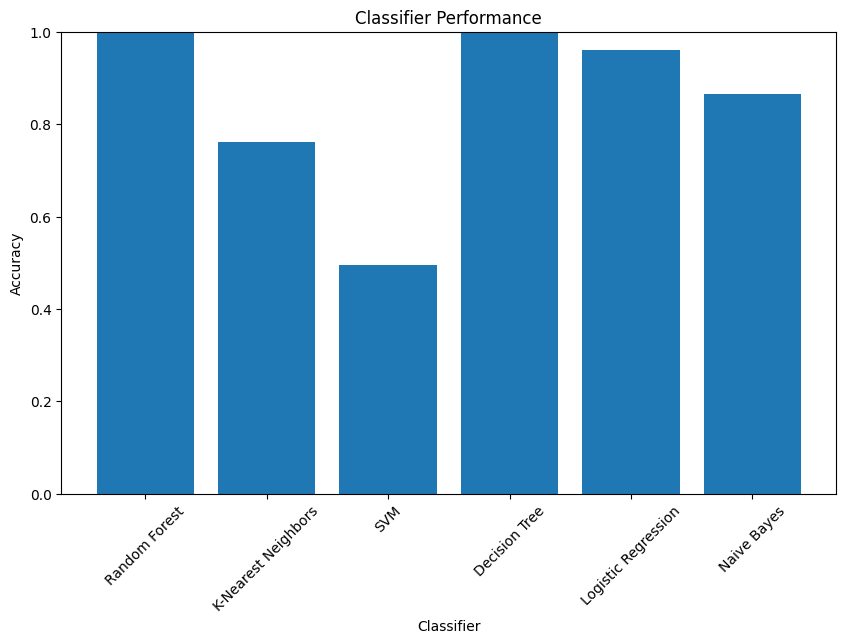

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier_model = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
} 
classifier_names = []
accuracy_scores = []

for classifier in classifier_model:
    classifier_name=classifier
    model = classifier_model[classifier] 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    print(f"{classifier_name} Accuracy: {accuracy}")
    

# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()    

## HyperParameter tunning the RF classifier

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Getting the best parameter
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Training with best parameter
best_classifier = RandomForestClassifier(random_state=42, **best_params)
best_classifier.fit(x_train, y_train)

# Predicition
y_pred = best_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9987670059646998
Test Accuracy: 0.9991780821917808


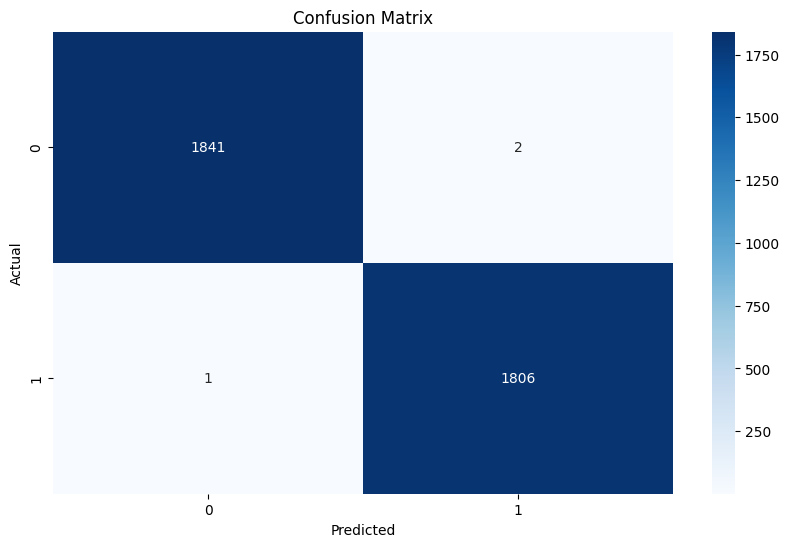

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1843
           1       1.00      1.00      1.00      1807

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



In [73]:
from sklearn.metrics import confusion_matrix,classification_report

# plot confusion matrix 
fig = plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
report = classification_report(y_test, y_pred)
print(report)

In [74]:
# Saving the model
import joblib
joblib.dump(best_classifier,'random_forest_classifier_model.pkl')

['random_forest_classifier_model.pkl']